In [1]:
from torchsummary import summary

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np

from scipy import misc

import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 5
num_classes = 10
batch_size = 32
learning_rate = 0.001

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [3]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [4]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(2048, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [5]:
model = ConvNet(num_classes).to(device)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(20):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==20:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        

20
0.4753465406084061
0.835
0.9356266638755798
0.7093


In [7]:
trainloader_2 = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset_2 = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader_2 = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [8]:
model2= ConvNet(num_classes).to(device)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

for epoch in range(20):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader_2):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model2(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==20:
        
        for i,(images, labels) in enumerate(testloader_2):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model2(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)

0.46055795688629153
0.83788
0.8795705589294434
0.7271


In [66]:
model3= ConvNet(num_classes).to(device)

In [95]:
line_train_loss=[]
line_test_loss=[]
line_train_acc=[]
line_test_acc=[]
alpha_list=[]

In [96]:
for alpha in np.arange(-1,2,0.05):


    newmodel_dict=model3.state_dict()

    for k in newmodel_dict:

        newmodel_dict[k]= alpha * model.state_dict()[k] +( 1- alpha) * model2.state_dict()[k]


    model3.load_state_dict(newmodel_dict)


    test_total=0
    test_correct=0.0
    test_loss=0.0
    train_correct=0.0
    train_loss=0.0
    train_total=0
    for i,(images, labels) in enumerate(testloader_2):
                images = images.to(device)
                labels = labels.to(device)
                outputs = model3(images)
                loss=criterion(outputs, labels)
                test_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()


    for i,(images, labels) in enumerate(trainloader):
                images = images.to(device)
                labels = labels.to(device)
                outputs = model3(images)
                loss=criterion(outputs, labels)
                train_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()
    print("alpha :" +str(alpha))
    print("train loss : " + str(train_loss/train_total))
    print("train acc : "+ str(train_correct/train_total))
    print("test loss :" + str(test_loss/test_total))
    print("test acc : " +str(test_correct/test_total))
    alpha_list.append(alpha)
    line_train_loss.append(train_loss/train_total)
    line_test_loss.append(test_loss/test_total)
    line_train_acc.append(train_correct/train_total)
    line_test_acc.append(test_correct/test_total)

alpha :-1.0
train loss : 15.230583014831543
train acc : 0.21374
test loss :15.375588027954102
test acc : 0.2121
alpha :-0.95
train loss : 14.127009423217773
train acc : 0.22008
test loss :14.282816317749024
test acc : 0.2184
alpha :-0.8999999999999999
train loss : 13.050562254638672
train acc : 0.22756
test loss :13.214957536315918
test acc : 0.226
alpha :-0.8499999999999999
train loss : 12.00068214996338
train acc : 0.23722
test loss :12.170570935058594
test acc : 0.2333
alpha :-0.7999999999999998
train loss : 10.981013172302246
train acc : 0.24704
test loss :11.151162924194336
test acc : 0.2409
alpha :-0.7499999999999998
train loss : 9.960547342529297
train acc : 0.25848
test loss :10.16109605102539
test acc : 0.2524
alpha :-0.6999999999999997
train loss : 8.982496306152344
train acc : 0.27294
test loss :9.199371472167968
test acc : 0.2637
alpha :-0.6499999999999997
train loss : 8.018687449798584
train acc : 0.2859
test loss :8.266286469268799
test acc : 0.2762
alpha :-0.599999999999

In [97]:
len(alpha_list)

60

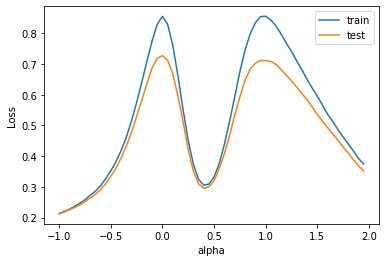

In [102]:
plt.plot(alpha_list, line_train_acc,label="train")
plt.plot(alpha_list, line_test_acc,label="test")
plt.ylabel('Loss')
plt.xlabel('alpha')
plt.legend()
plt.show()

In [ ]:
plt.plot(alpha_list, line_train_loss,label="train")
plt.plot(alpha_list, line_test_loss,label="test")
plt.ylabel('Acc')
plt.xlabel('alpha')
plt.legend()
plt.show()